In [9]:
import pandas as pd 
import pandas_datareader as pdr 
import datetime as dt
from IPython.display import display

# Create a time frame 
start_date = dt.datetime(2021,1,1)
end_date = dt.datetime.now()

# Create a DataFrame containing data about a specified stock
ticker = 'AAPL'
ticker_data = pdr.get_data_yahoo(ticker, start_date, end_date)
display(ticker_data)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.453445
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.041626
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.664215
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.952271
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.073929
...,...,...,...,...,...,...
2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.610001
2022-04-01,174.880005,171.940002,174.029999,174.309998,78699800.0,174.309998
2022-04-04,178.490005,174.440002,174.570007,178.440002,76468400.0,178.440002


In [10]:
import numpy as np

# Create new columns in the DataFrame to show short and long moving averages 
ticker_data['Short SMA'] = ticker_data['Adj Close'].rolling(window=30, min_periods=1).mean()
ticker_data['Long SMA'] = ticker_data['Adj Close'].rolling(window=100, min_periods=1).mean()

# Create a position column which can represent where a crossover happens 
ticker_data['Position'] = np.where(ticker_data['Short SMA'] > ticker_data['Long SMA'], 1, 0)

# Create a signal column to determine buy(1) or sell(-1) when position changes
ticker_data['Signal'] = ticker_data['Position'].diff() 

# Replace all NaN values with 0
ticker_data.fillna(0, inplace=True)

display(ticker_data)

,High,Low,Open,Close,Volume,Adj Close,Short SMA,Long SMA,Position,Signal
Date,,,,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.453445,128.453445,128.453445,0,0.0
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.041626,129.247536,129.247536,0,0.0
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.664215,128.053095,128.053095,0,0.0
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.952271,128.527889,128.527889,0,0.0
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.073929,129.037097,129.037097,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.610001,165.180668,167.179489,0,0.0
2022-04-01,174.880005,171.940002,174.029999,174.309998,78699800.0,174.309998,165.361668,167.420103,0,0.0
2022-04-04,178.490005,174.440002,174.570007,178.440002,76468400.0,178.440002,165.733001,167.698322,0,0.0


In [11]:
# Write all ticker data to an excel file to view fully

# Create a new Excel file
file = pd.ExcelWriter('Ticker_Data.xlsx', engine='xlsxwriter')

# Import DataFrame into the file 
ticker_data.to_excel(file, '{} Data'.format(ticker))
file.save()

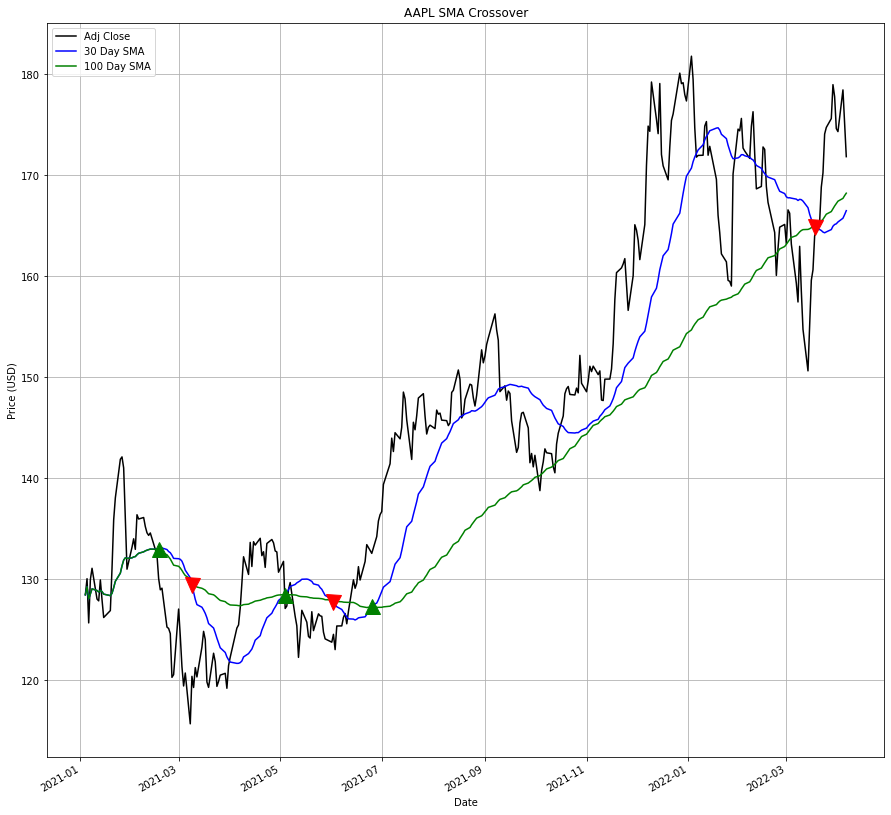

In [12]:
import matplotlib.pyplot as plt

# Plot close price, short SMA, and long SMA; Set title, y-axis label, and legend
ticker_data['Adj Close'].plot(color='k', title='{} SMA Crossover'.format(ticker), ylabel='Price (USD)', figsize=(15,15))
ticker_data['Short SMA'].plot(color='b', label='30 Day SMA')
ticker_data['Long SMA'].plot(color='g', label='100 Day SMA', grid=True).legend(loc='upper left')

# Plot 'buy' signals
plt.plot(ticker_data[ticker_data['Signal'] == 1].index, ticker_data['Short SMA'][ticker_data['Signal'] == 1], '^', markersize = 15, color = 'g', label = 'buy')

# Plot 'sell' signals 
plt.plot(ticker_data[ticker_data['Signal'] == -1].index, ticker_data['Short SMA'][ticker_data['Signal'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')